In [64]:
#importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/EastWestAirlines.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [65]:
#expolatory data analysis
data.info()
#info shows that there are no null in the data set and every column is a int type data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [66]:
#looking for nulls in dataset
data.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [67]:
#EDA
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [68]:
#identifing and removing outliers
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    # Calculate the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    print(data)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

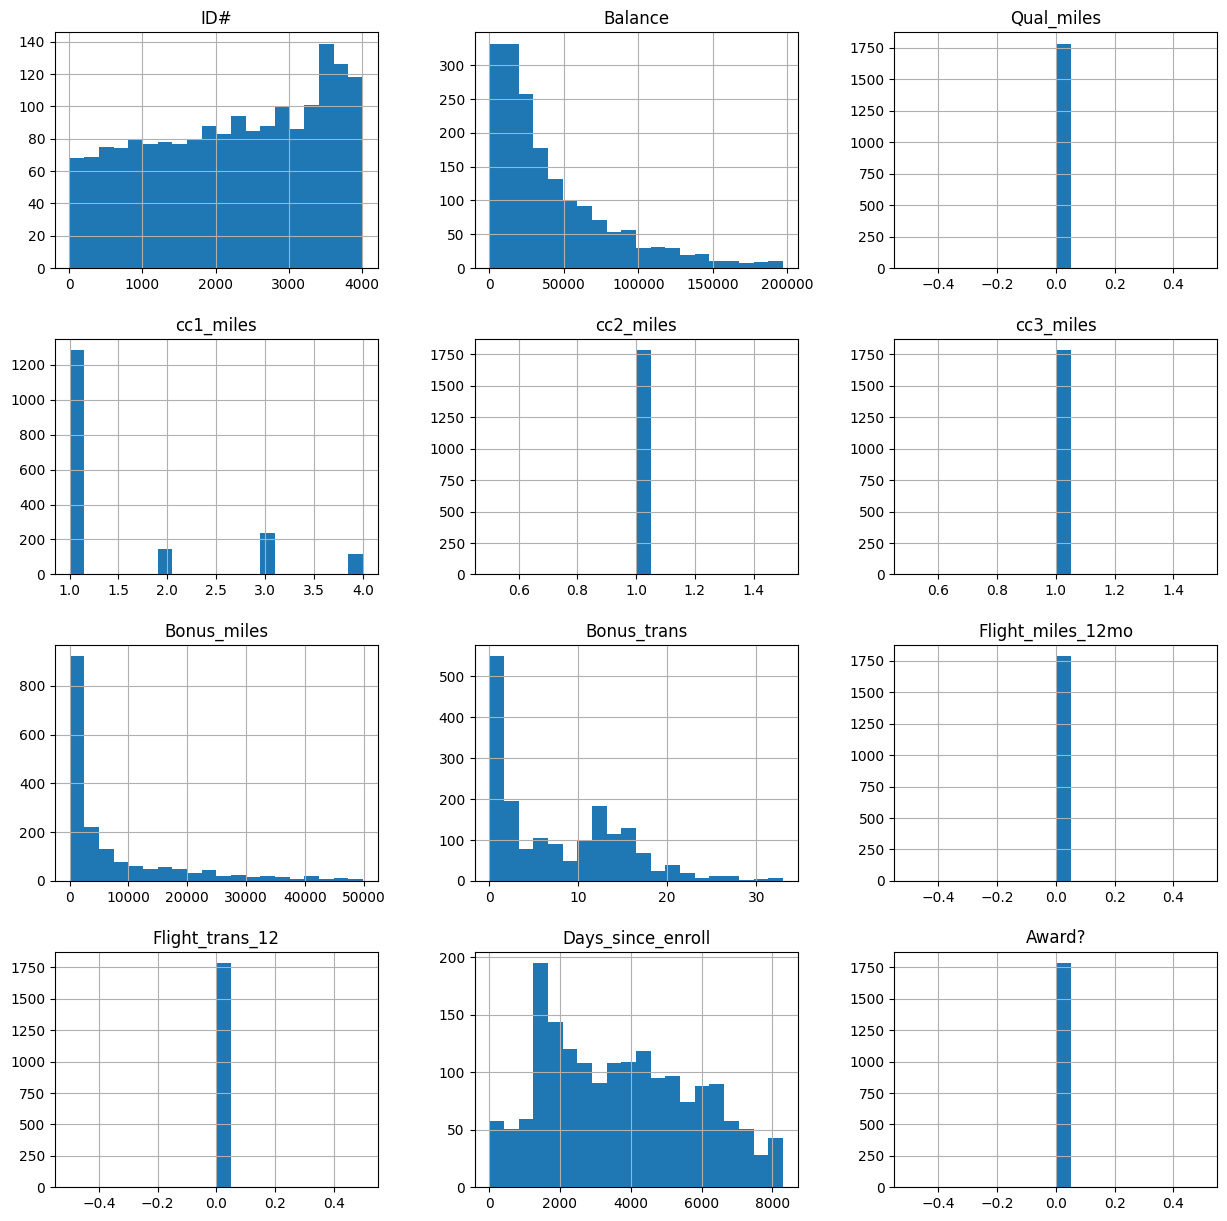

In [69]:
#visuvalizing the data
#1-histogram
data.hist(bins=20,figsize=(15,15))
plt.show()

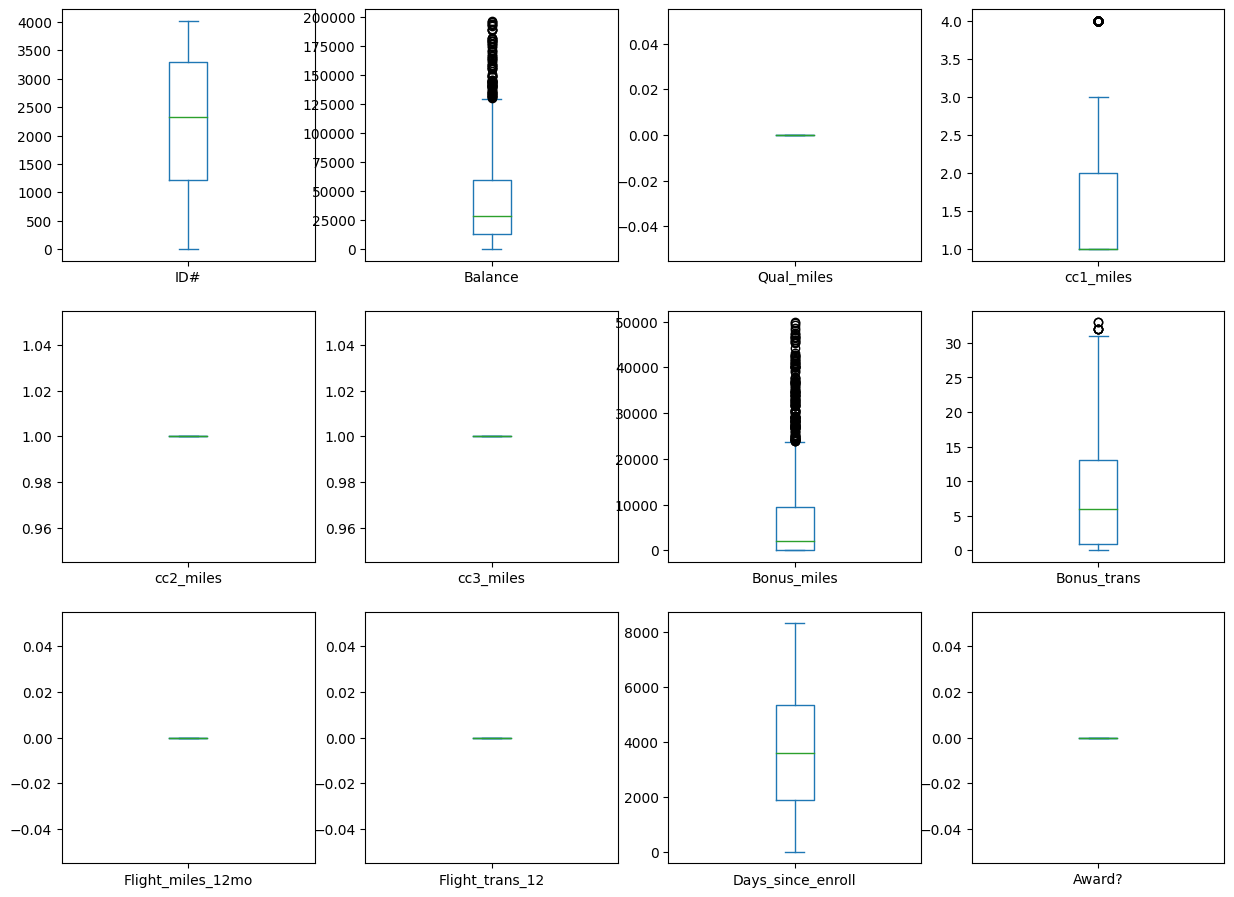

In [70]:
#2-boxplot
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,15))
plt.show()

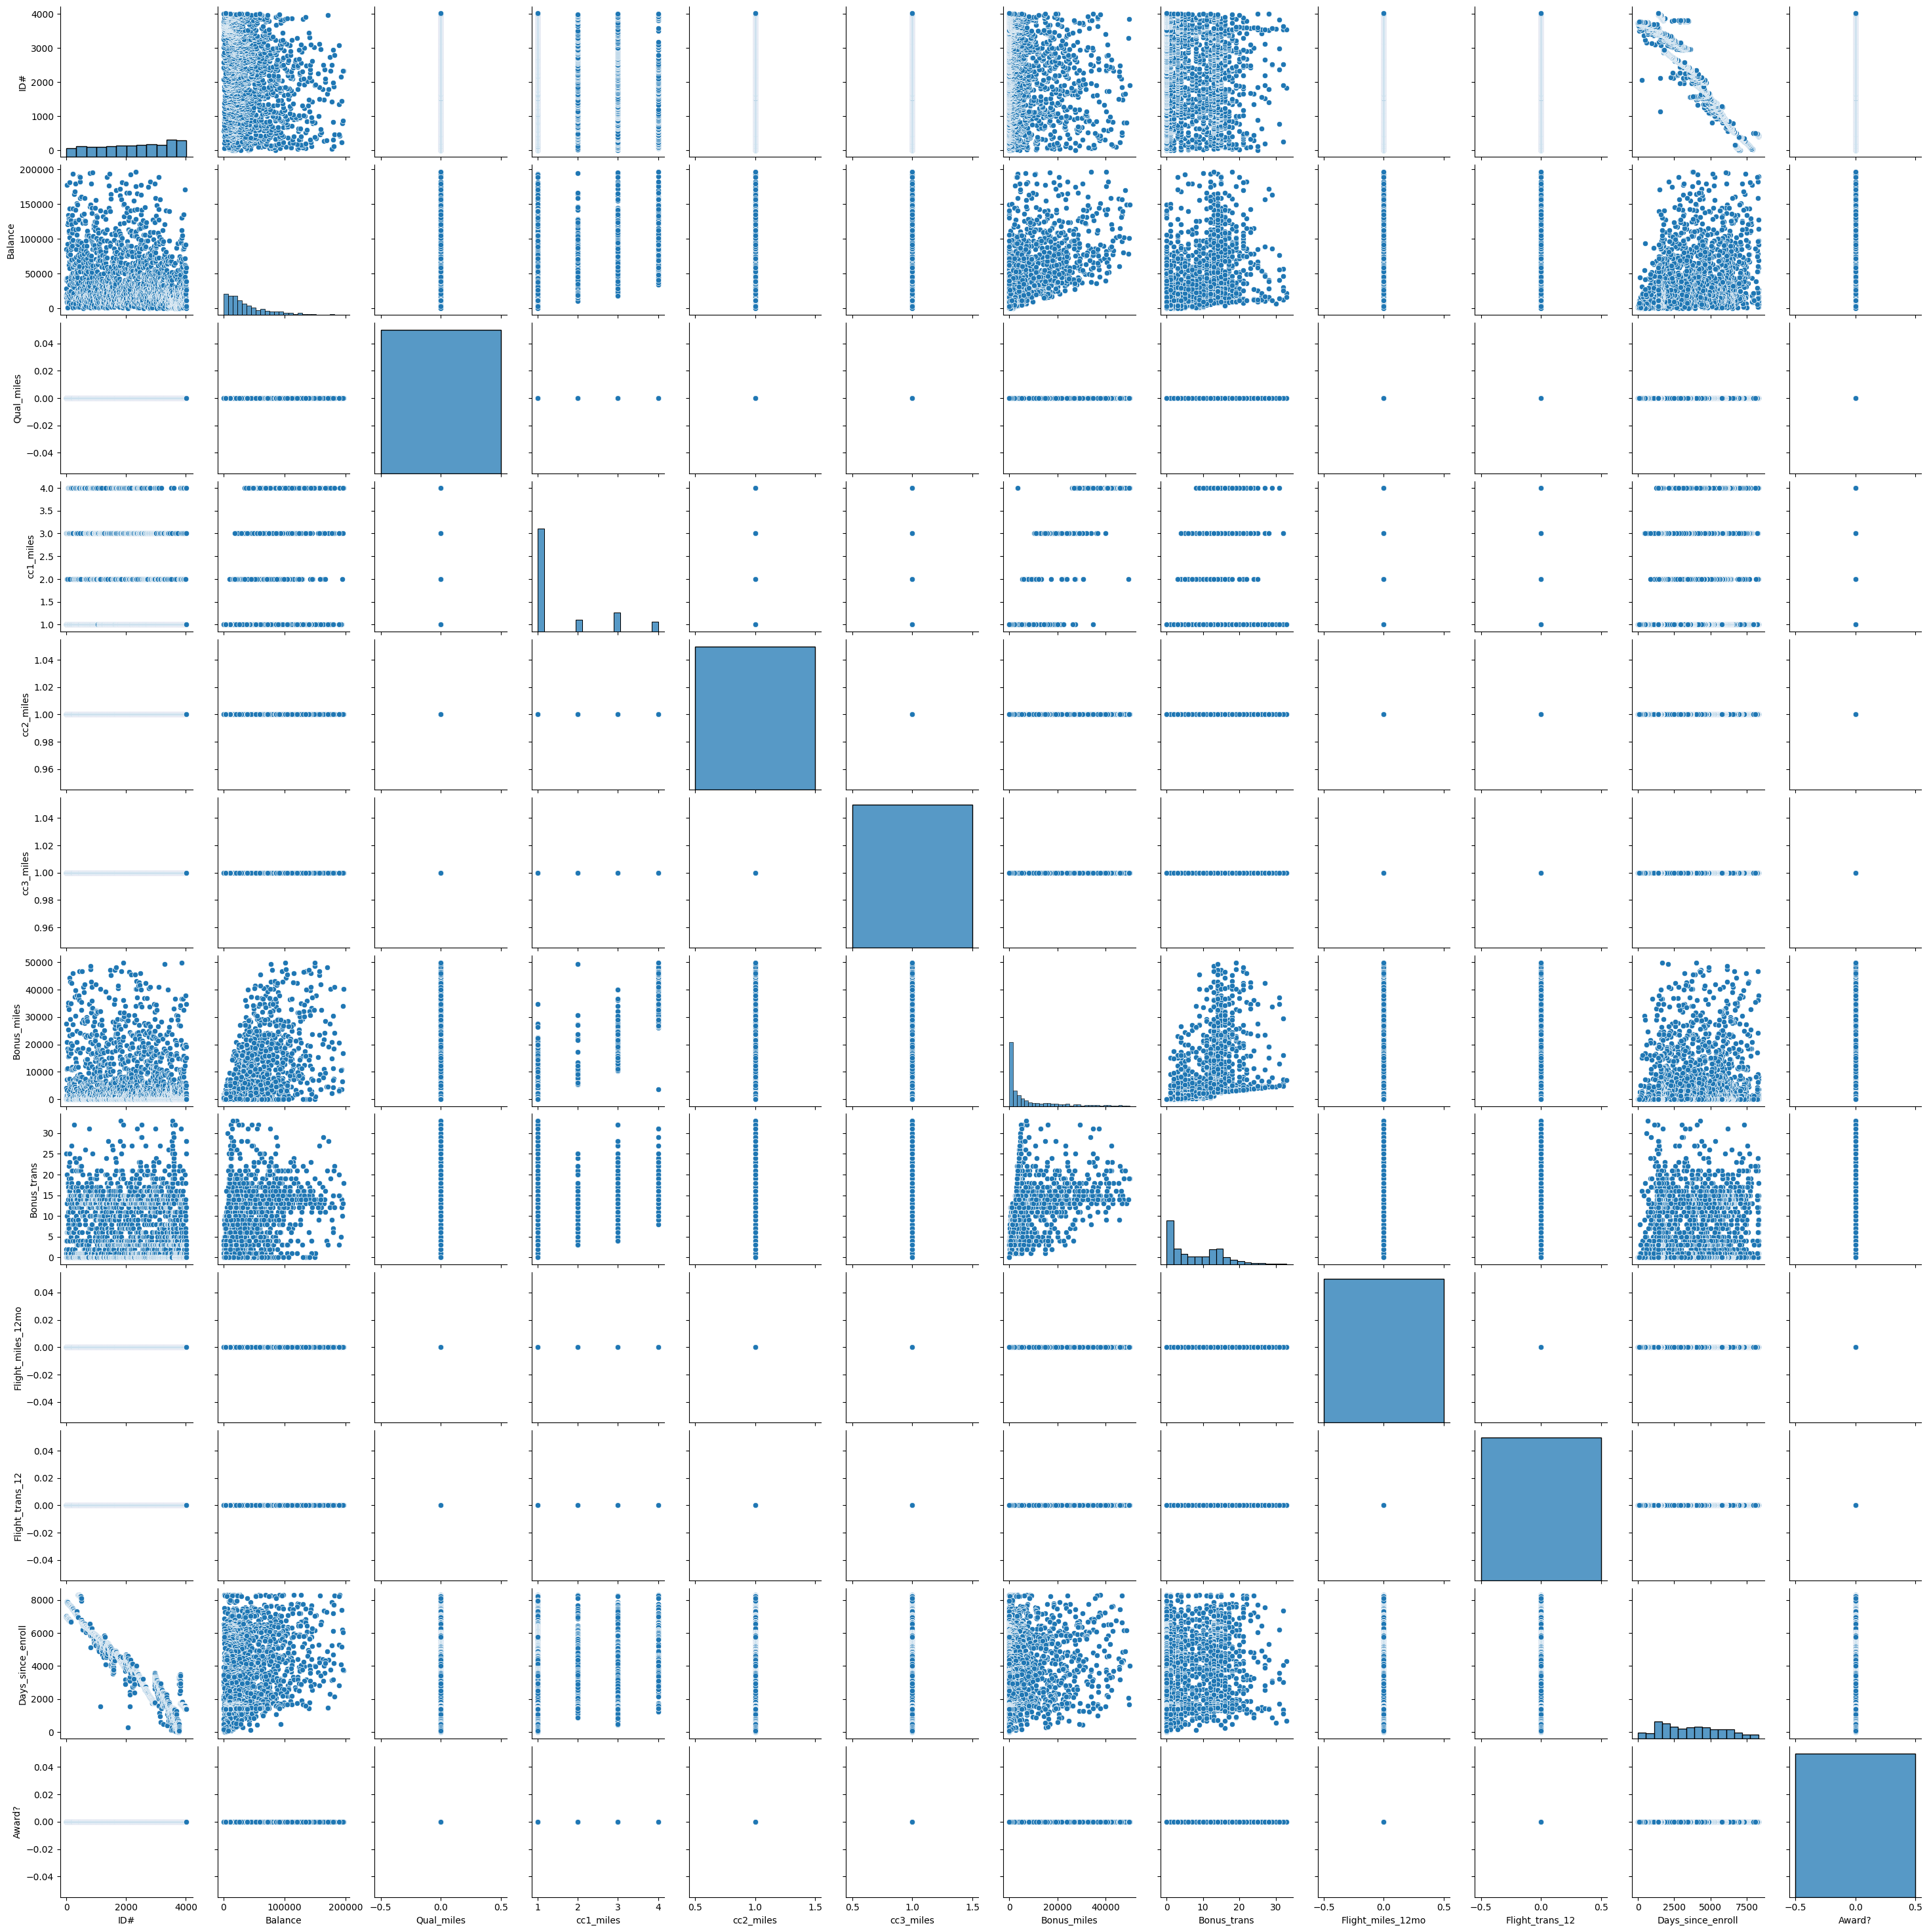

In [71]:
#3-pairplot
#identifying potential clusters
sns.pairplot(data)
plt.show()

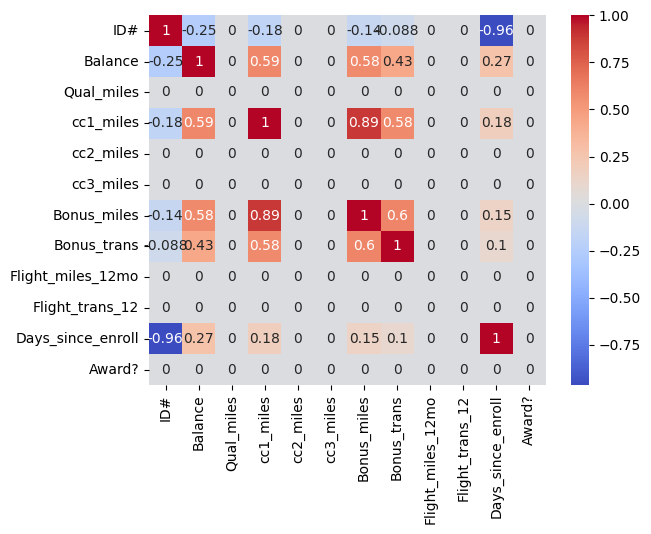

In [72]:
#looking for patterns with heatmap
correlation_matrix = data.corr()
correlation_matrix = correlation_matrix.fillna(0)
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

In [73]:
#importing essential machine learning libraries and standardising the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


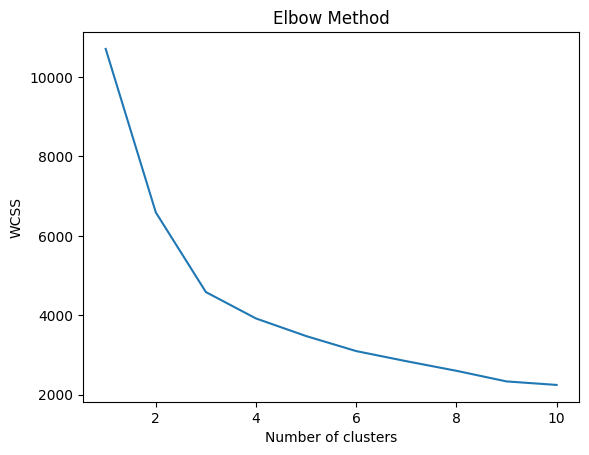

In [74]:
#using kmeans
#ELBOW METHOD
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Silhouette Score for K-Means: 0.3311365182084344


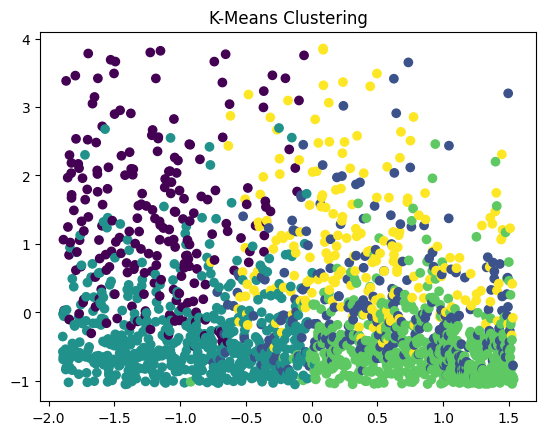

In [75]:
#KMEANS with optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)
labels_kmeans = kmeans.labels_

# Silhouette Score
silhouette_kmeans = silhouette_score(data_scaled, labels_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Plotting
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


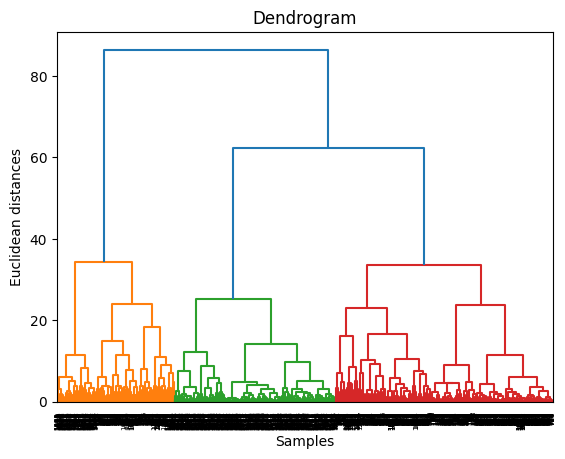

In [76]:
#creating a dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


Silhouette Score for Hierarchical Clustering: 0.3188776168209339


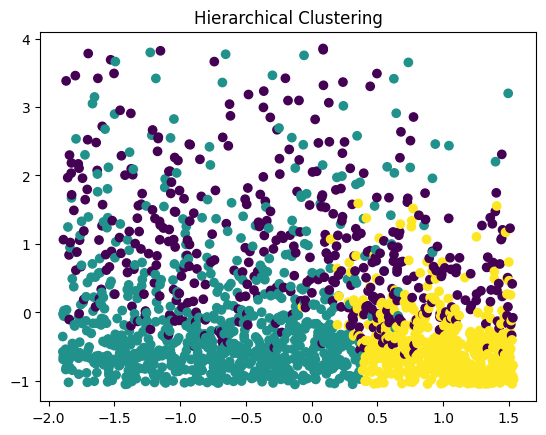

In [77]:
# Hierarchical Clustering with Optimal Number of Clusters
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hc = hc.fit_predict(data_scaled)

# Silhouette Score
silhouette_hc = silhouette_score(data_scaled, labels_hc)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc}")

# Plotting
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_hc, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()



Silhouette Score for DBSCAN: -0.19500040991607412


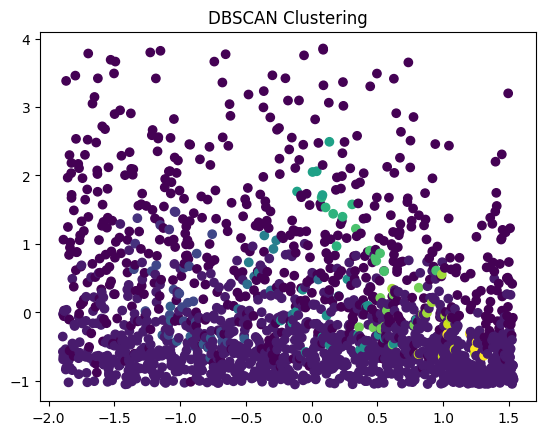

In [78]:
#DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(data_scaled)

# Silhouette Score
silhouette_dbscan = silhouette_score(data_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else 'undefined'
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

# Plotting
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [79]:
# Analysis and insights for each clustering algorithm
print("K-Means Clusters:")
print(data.groupby(labels_kmeans).mean())

print("Hierarchical Clusters:")
print(data.groupby(labels_hc).mean())

print("DBSCAN Clusters:")
print(data[labels_dbscan != -1].groupby(labels_dbscan[labels_dbscan != -1]).mean())


K-Means Clusters:
           ID#       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0   835.862559  97206.393365         0.0   2.919431        1.0        1.0   
1  2905.266667  43361.233333         0.0   1.281481        1.0        1.0   
2  1119.689524  28928.022857         0.0   1.043810        1.0        1.0   
3  3249.176265  20108.101222         0.0   1.006981        1.0        1.0   
4  2673.368932  80097.558252         0.0   3.262136        1.0        1.0   

    Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0  19764.431280    14.890995                0.0              0.0   
1   6133.848148    14.537037                0.0              0.0   
2   1854.459048     4.179048                0.0              0.0   
3   1315.434555     2.214660                0.0              0.0   
4  25125.140777    15.466019                0.0              0.0   

   Days_since_enroll  Award?  
0        6204.909953     0.0  
1        2578.551852     0.0  
2        5637.933

In [80]:
#silhouette score
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")


Silhouette Score for K-Means: 0.3311365182084344
Silhouette Score for Hierarchical Clustering: 0.3188776168209339
Silhouette Score for DBSCAN: -0.19500040991607412
